## Knowledge Distribution
_Which author does know which parts of a system?_

In [1]:
from ozapfdis import git

log = git.log_numstat_existing("../../../dropover/")
log.head()

,additions,deletions,file,sha,timestamp,author
0,191.0,0.0,backend/pom-2016-07-16_04-40-56-752.xml,8c686954,2016-07-22 17:43:38,Michael
1,1.0,1.0,backend/src/test/java/at/dropover/scheduling/i...,97c6ef96,2016-07-16 09:51:15,Markus
2,55.0,0.0,backend/src/test/java/at/dropover/scheduling/i...,432113a2,2016-07-15 21:17:07,Chris
3,19.0,3.0,backend/src/main/webapp/app/widgets/gallery/js...,3f7cf92c,2016-07-16 09:07:31,Markus
4,24.0,11.0,backend/src/main/webapp/app/widgets/gallery/js...,bf2b00ba,2014-10-26 05:52:48,Michael


## Data Cleaning
Just keep the production code

In [2]:
java_prod = log[log['file'].str.contains("backend/src/main/java/")].copy()
java_prod = java_prod[~java_prod['file'].str.contains("package-info.java")]
java_prod.head()

,additions,deletions,file,sha,timestamp,author
9,3.0,4.0,backend/src/main/java/at/dropover/files/intera...,ec85fe73,2016-07-16 08:12:29,Chris
10,68.0,6.0,backend/src/main/java/at/dropover/files/intera...,0732e9cb,2016-07-16 00:27:20,Chris
11,6.0,6.0,backend/src/main/java/at/dropover/files/intera...,a526cce1,2016-07-15 16:40:07,Chris
12,1.0,1.0,backend/src/main/java/at/dropover/files/intera...,ad06aa87,2014-12-04 08:16:02,Markus
13,3.0,5.0,backend/src/main/java/at/dropover/files/intera...,b5dd5695,2014-08-13 15:46:28,Chris


## Analysis
Which author has how much "knowledge"?

In [3]:
author_knowledge = java_prod['author'].value_counts() / java_prod['author'].count()
author_knowledge

Chris      0.609572
Markus     0.218304
Michael    0.172124
Name: author, dtype: float64

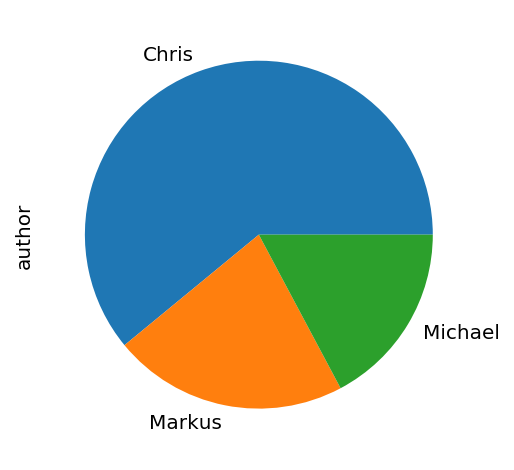

In [4]:
author_knowledge.plot.pie();

Which author does "know" which module? 

In [5]:
java_prod['module'] = java_prod['file'].str.split("/").str[6]
java_prod['commit'] = 1
java_prod.head()

,additions,deletions,file,sha,timestamp,author,module,commit
9,3.0,4.0,backend/src/main/java/at/dropover/files/intera...,ec85fe73,2016-07-16 08:12:29,Chris,files,1
10,68.0,6.0,backend/src/main/java/at/dropover/files/intera...,0732e9cb,2016-07-16 00:27:20,Chris,files,1
11,6.0,6.0,backend/src/main/java/at/dropover/files/intera...,a526cce1,2016-07-15 16:40:07,Chris,files,1
12,1.0,1.0,backend/src/main/java/at/dropover/files/intera...,ad06aa87,2014-12-04 08:16:02,Markus,files,1
13,3.0,5.0,backend/src/main/java/at/dropover/files/intera...,b5dd5695,2014-08-13 15:46:28,Chris,files,1


In [6]:
knowledge_per_module = java_prod.groupby(['module', 'author'])[['commit']].count()
knowledge_per_module['all'] = knowledge_per_module.groupby(['module'])['commit'].transform('sum')
knowledge_per_module['ratio'] = knowledge_per_module['commit'] / knowledge_per_module['all']
knowledge_per_module.head()

commit  all     ratio
module  author                        
comment Chris        76  118  0.644068
        Markus       41  118  0.347458
        Michael       1  118  0.008475
creator Chris        33   54  0.611111
        Markus       14   54  0.259259

## Visualization

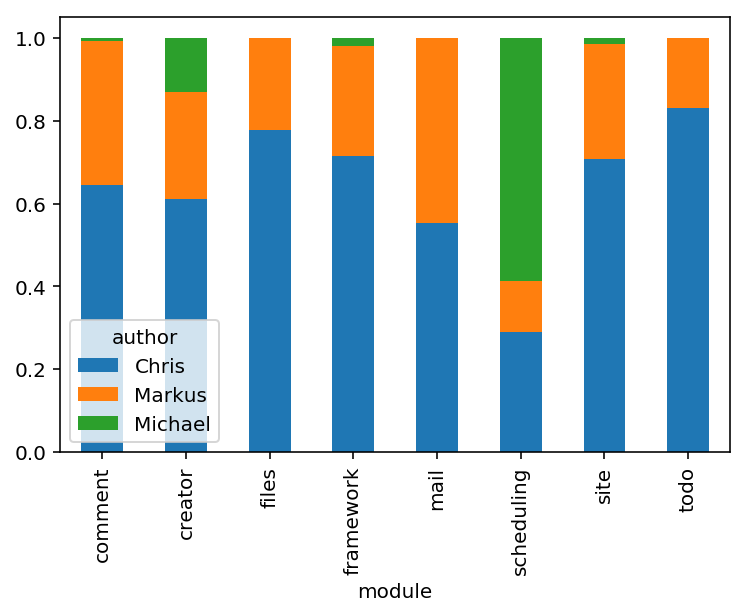

In [7]:
knowledge_per_module.unstack()['ratio'].plot.bar(stacked=True);